# Visualisation and Representation of data


In this section, we will analyze the historical data of energy purchased/sold

In [12]:
#Importing Required Libraries
import matplotlib.pyplot as plt 
import pandas as pd
import os


In [69]:
# Read the first few lines of the file to inspect its structure
file_path = '/Users/mac/Desktop/Datos/analisis_datos/Grupo_3/data/curva_pbc_uof_20240201.1'
df = pd.read_csv(file_path, encoding='latin1', sep=';', skiprows=2)
df

,Hora,Fecha,Pais,Unidad,Tipo Oferta,Energía Compra/Venta,Precio Compra/Venta,Ofertada (O)/Casada (C),Unnamed: 8
0,1.0,01/02/2024,MI,TOTRM01,C,"496,0","1.500,00",O,NaN
1,1.0,01/02/2024,MI,TOTRM02,C,"138,0","1.500,00",O,NaN
2,1.0,01/02/2024,MI,TOTRM03,C,"56,0","1.500,00",O,NaN
3,1.0,01/02/2024,MI,BPRM01,C,"31,4","1.002,00",O,NaN
4,1.0,01/02/2024,MI,EUCDR01,C,"9,3","1.002,00",O,NaN
5,1.0,01/02/2024,MI,ZELTC01,C,"0,2","800,00",O,NaN
6,1.0,01/02/2024,MI,HCGCOX,C,"2,7","701,00",O,NaN
7,1.0,01/02/2024,MI,STROC01,C,"0,1","700,05",O,NaN
8,1.0,01/02/2024,MI,ACCGC02,C,"35,2","551,00",O,NaN
9,1.0,01/02/2024,MI,ALDRC02,C,"31,0","501,00",O,NaN


In [70]:
# Remove thousand separators in numeric columns
df['Energía Compra/Venta'] = df['Energía Compra/Venta'].str.replace('.', '', regex=False)
df['Precio Compra/Venta'] = df['Precio Compra/Venta'].str.replace('.', '', regex=False)

# Remplacer les virgules par des points dans les colonnes numériques
df['Energía Compra/Venta'] = df['Energía Compra/Venta'].str.replace(',', '.', regex=False).astype(float)
df['Precio Compra/Venta'] = df['Precio Compra/Venta'].str.replace(',', '.', regex=False).astype(float)

# Supprimer la colonne non nécessaire 'Unnamed: 8'
df.drop(columns=['Unnamed: 8'], inplace=True)

print(df.head())
print(df.dtypes)

   Hora       Fecha Pais   Unidad Tipo Oferta  Energía Compra/Venta  \
0   1.0  01/02/2024   MI  TOTRM01           C                 496.0   
1   1.0  01/02/2024   MI  TOTRM02           C                 138.0   
2   1.0  01/02/2024   MI  TOTRM03           C                  56.0   
3   1.0  01/02/2024   MI   BPRM01           C                  31.4   
4   1.0  01/02/2024   MI  EUCDR01           C                   9.3   

   Precio Compra/Venta Ofertada (O)/Casada (C)  
0               1500.0                       O  
1               1500.0                       O  
2               1500.0                       O  
3               1002.0                       O  
4               1002.0                       O  
Hora                       float64
Fecha                       object
Pais                        object
Unidad                      object
Tipo Oferta                 object
Energía Compra/Venta       float64
Precio Compra/Venta        float64
Ofertada (O)/Casada (C)     object

1. Visualizing the Distribution of Purchase/Sale Prices

/Users/mac/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mac/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


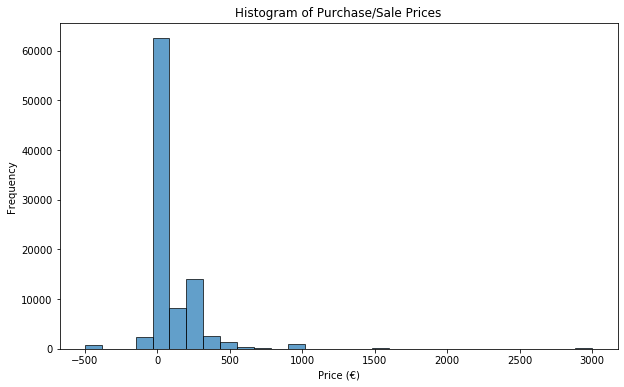

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df['Precio Compra/Venta'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Purchase/Sale Prices")
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of purchase/sale prices. Each bin represents a range of prices, and the height of each bin indicates the frequency of prices within that range. This visualization helps to understand the most common price ranges in the dataset.

2. Aggregating Data by Hour and Visualizing Energy Purchased/Sold Over Time

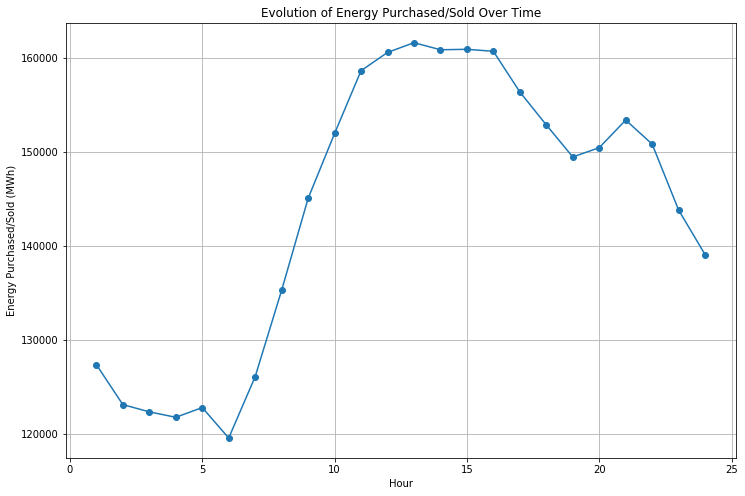

,Hora,Energía Compra/Venta
0,1.0,127371.1
1,2.0,123130.0
2,3.0,122359.6
3,4.0,121782.3
4,5.0,122815.0
5,6.0,119578.2
6,7.0,126106.5
7,8.0,135282.2
8,9.0,145036.5
9,10.0,151935.3


In [84]:
# Aggregate data by hour to get the total energy purchased/sold
energy_per_hour = df.groupby('Hora')['Energía Compra/Venta'].sum().reset_index()

# Plot the evolution of energy purchased/sold over time
plt.figure(figsize=(12, 8))
plt.plot(energy_per_hour['Hora'], energy_per_hour['Energía Compra/Venta'], marker='o', linestyle='-')
plt.title("Evolution of Energy Purchased/Sold Over Time")
plt.xlabel('Hour')
plt.ylabel('Energy Purchased/Sold (MWh)')
plt.grid(True)
plt.show()

# Afficher le DataFrame de l'énergie achetée/vendue par heure
energy_per_hour

5. Visualizing the Distribution of Offer Types

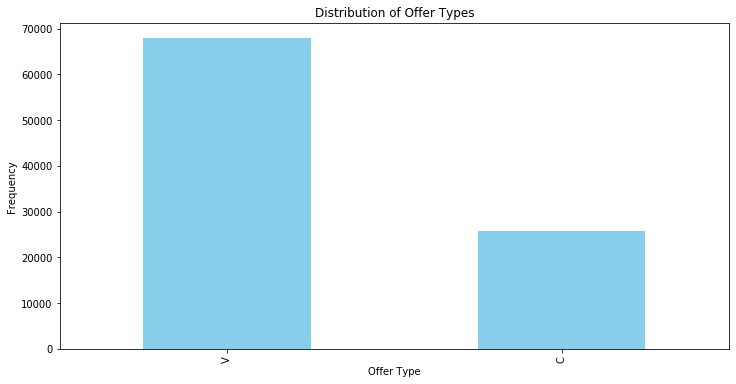

In [85]:

plt.figure(figsize=(12, 6))
df['Tipo Oferta'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Offer Types")
plt.xlabel('Offer Type')
plt.ylabel('Frequency')
plt.show()

This bar chart shows the distribution of different types of offers ( C : Comprada and V : ventada)

In [64]:
offre[offre["Precio Compra/Venta"]>0].head()


,Hora,Fecha,Pais,Unidad,Tipo Oferta,Energía Compra/Venta,Precio Compra/Venta,Ofertada (O)/Casada (C)
64317,17.0,2024-02-01,MI,ACAVADO,V,53.0,0.01,O
64318,17.0,2024-02-01,MI,GALVD28,V,5.0,0.01,O
64319,17.0,2024-02-01,MI,GALVD29,V,5.0,0.01,O
64320,17.0,2024-02-01,MI,GALVD30,V,5.0,0.01,O
64321,17.0,2024-02-01,MI,ESCCC1,V,155.0,0.10,O


6. Visualizing Supply and Demand Curves for a Specific Hour

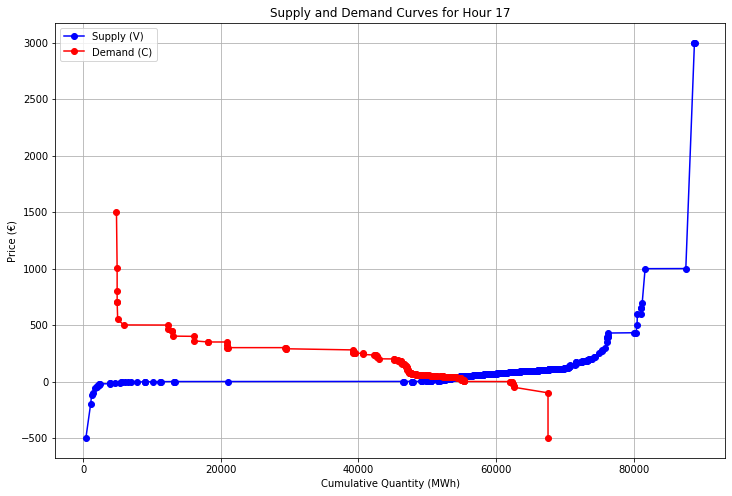

In [92]:
from scipy import interpolate

# Filter data for a specific hour, for example, 'Hora 17'
hora_fixe = 17  # You can change this value for other hours
df_hora = df[df['Hora'] == hora_fixe]

# Filter data to separate sale (V) and purchase (C) offer types
offre = df_hora[df_hora['Tipo Oferta'] == 'V']
demande = df_hora[df_hora['Tipo Oferta'] == 'C']

# Aggregate data by cumulative quantity and calculate the average price for each cumulative quantity
offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

# Sort data to make the offer curve increasing and the demand curve decreasing
offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

# Calculate the cumulative quantity for offer and demand
offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

# Plot the supply and demand curves
plt.figure(figsize=(12, 8))

plt.plot(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], label='Supply (V)', color='blue', marker='o')
plt.plot(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], label='Demand (C)', color='red', marker='o')

plt.title(f"Supply and Demand Curves for Hour {hora_fixe}")
plt.xlabel('Cumulative Quantity (MWh)')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.show()



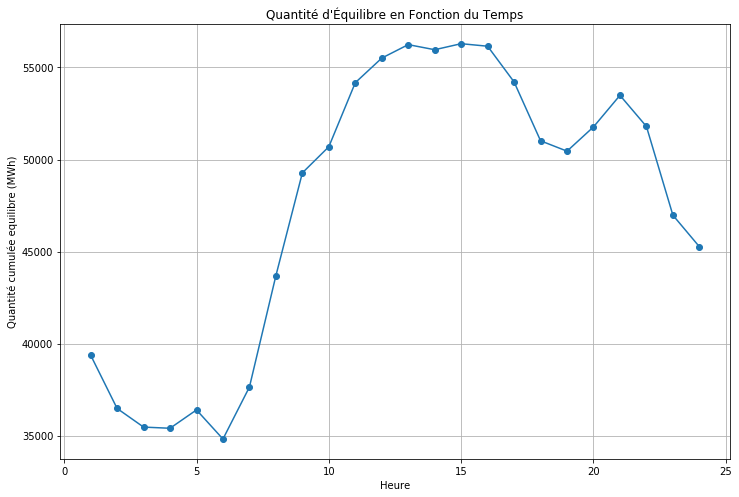

,Hora,Quantité d'Équilibre
0,1.0,39372.595190
1,2.0,36474.905812
2,3.0,35462.305611
3,4.0,35398.706212
4,5.0,36395.096192
5,6.0,34813.514228
6,7.0,37638.903206
7,8.0,43690.004409
8,9.0,49276.153507
9,10.0,50695.251703


In [93]:
# visualisation de la quantité totale sur l'horizon d'un temps 

# Liste pour stocker les quantités d'équilibre pour chaque heure
equilibrium_quantities = []

# Calculer la quantité d'équilibre pour chaque heure
for hora in sorted(df['Hora'].unique()):
    df_hora = df[df['Hora'] == hora]

    # Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
    offre = df_hora[df_hora['Tipo Oferta'] == 'V']
    demande = df_hora[df_hora['Tipo Oferta'] == 'C']

    if offre.empty or demande.empty:
        continue

    # Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
    offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
    demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

    # Trier les données pour que l'offre soit croissante et la demande décroissante
    offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
    demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

    # Calculer la quantité cumulée pour l'offre et la demande
    offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
    demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

    # Créer des fonctions d'interpolation
    offre_interpol = interpolate.interp1d(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")
    demande_interpol = interpolate.interp1d(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")

    # Trouver la quantité où les prix sont égaux (approximation)
    quantities = np.linspace(max(offre_aggregated['Quantité Cumulée'].min(), demande_aggregated['Quantité Cumulée'].min()), 
                             min(offre_aggregated['Quantité Cumulée'].max(), demande_aggregated['Quantité Cumulée'].max()), 500)
    intersection_qty = quantities[np.abs(offre_interpol(quantities) - demande_interpol(quantities)).argmin()]
    
    # Stocker la quantité d'équilibre pour cette heure
    equilibrium_quantities.append((hora, intersection_qty))

# Convertir la liste des quantités d'équilibre en DataFrame
equilibrium_df = pd.DataFrame(equilibrium_quantities, columns=['Hora', 'Quantité d\'Équilibre'])

# Tracer la courbe de la quantité d'équilibre en fonction des heures
plt.figure(figsize=(12, 8))
plt.plot(equilibrium_df['Hora'], equilibrium_df['Quantité d\'Équilibre'], marker='o', linestyle='-')
plt.title("Quantité d'Équilibre en Fonction du Temps")
plt.xlabel('Heure')
plt.ylabel('Quantité cumulée equilibre (MWh)')
plt.grid(True)
plt.show()

# Afficher le DataFrame des quantités d'équilibre
equilibrium_df

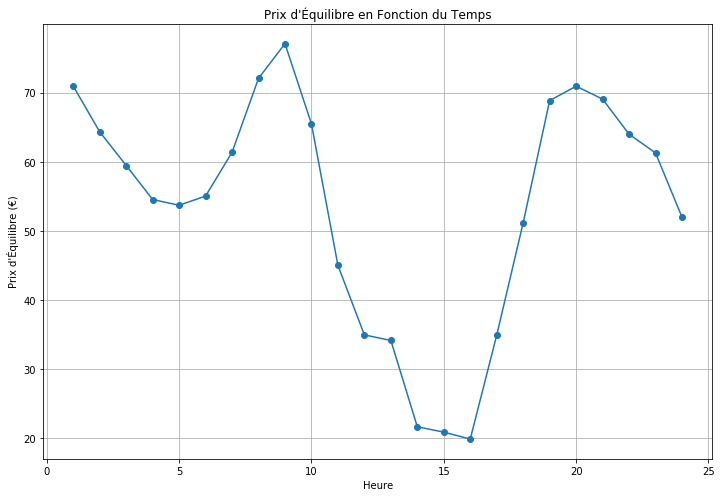

,Hora,Prix d'Équilibre
0,1.0,70.94353404121676
1,2.0,64.32746955449373
2,3.0,59.44965568721816
3,4.0,54.524393516377366
4,5.0,53.69142504477962
5,6.0,55.02728325503471
6,7.0,61.36517573077189
7,8.0,72.07803023189271
8,9.0,77.09782413040367
9,10.0,65.48116767962146


In [52]:
#visualisation de l evolution du prix de l 'electrecité sur le temps 
# Liste pour stocker les prix d'équilibre pour chaque heure
equilibrium_prices = []

# Calculer le prix d'équilibre pour chaque heure
for hora in sorted(df['Hora'].unique()):
    df_hora = df[df['Hora'] == hora]

    # Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
    offre = df_hora[df_hora['Tipo Oferta'] == 'V']
    demande = df_hora[df_hora['Tipo Oferta'] == 'C']

    if offre.empty or demande.empty:
        continue

    # Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
    offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
    demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

    # Trier les données pour que l'offre soit croissante et la demande décroissante
    offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
    demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

    # Calculer la quantité cumulée pour l'offre et la demande
    offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
    demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

    # Créer des fonctions d'interpolation
    offre_interpol = interpolate.interp1d(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")
    demande_interpol = interpolate.interp1d(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")

    # Trouver la quantité où les prix sont égaux (approximation)
    quantities = np.linspace(max(offre_aggregated['Quantité Cumulée'].min(), demande_aggregated['Quantité Cumulée'].min()), 
                             min(offre_aggregated['Quantité Cumulée'].max(), demande_aggregated['Quantité Cumulée'].max()), 500)
    intersection_qty = quantities[np.abs(offre_interpol(quantities) - demande_interpol(quantities)).argmin()]
    intersection_price = offre_interpol(intersection_qty)
    
    # Stocker le prix d'équilibre pour cette heure
    equilibrium_prices.append((hora, intersection_price))

# Convertir la liste des prix d'équilibre en DataFrame
equilibrium_df = pd.DataFrame(equilibrium_prices, columns=['Hora', 'Prix d\'Équilibre'])

# Tracer la courbe du prix d'équilibre en fonction des heures
plt.figure(figsize=(12, 8))
plt.plot(equilibrium_df['Hora'], equilibrium_df['Prix d\'Équilibre'], marker='o', linestyle='-')
plt.title("Prix d'Équilibre en Fonction du Temps")
plt.xlabel('Heure')
plt.ylabel('Prix d\'Équilibre (€)')
plt.grid(True)
plt.show()

# Afficher le DataFrame des prix d'équilibre
equilibrium_df


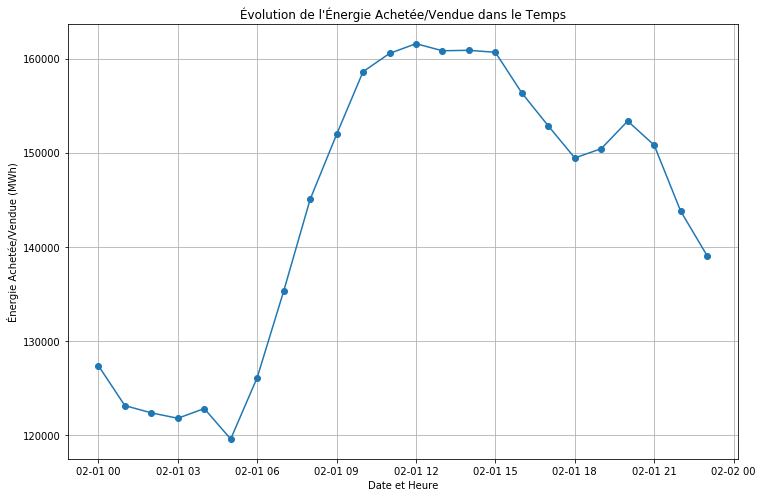

,Fecha_Hora,Energía Compra/Venta
0,2024-02-01 00:00:00,127371.1
1,2024-02-01 01:00:00,123130.0
2,2024-02-01 02:00:00,122359.6
3,2024-02-01 03:00:00,121782.3
4,2024-02-01 04:00:00,122815.0
5,2024-02-01 05:00:00,119578.2
6,2024-02-01 06:00:00,126106.5
7,2024-02-01 07:00:00,135282.2
8,2024-02-01 08:00:00,145036.5
9,2024-02-01 09:00:00,151935.3


In [78]:
# PREVISION Test
# Convertir la colonne 'Fecha' en datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Agréger les données par date et heure pour obtenir la somme de l'énergie achetée/vendue
df['Fecha_Hora'] = df['Fecha'] + pd.to_timedelta(df['Hora'] - 1, unit='h')
energy_per_hour = df.groupby('Fecha_Hora')['Energía Compra/Venta'].sum().reset_index()

# Tracer la courbe de l'évolution de l'énergie achetée/vendue dans le temps
plt.figure(figsize=(12, 8))
plt.plot(energy_per_hour['Fecha_Hora'], energy_per_hour['Energía Compra/Venta'], marker='o', linestyle='-')
plt.title("Évolution de l'Énergie Achetée/Vendue dans le Temps")
plt.xlabel('Date et Heure')
plt.ylabel('Énergie Achetée/Vendue (MWh)')
plt.grid(True)
plt.show()

# Afficher le DataFrame de l'énergie achetée/vendue par heure
energy_per_hour

